In [1]:
import numpy as np
import matplotlib.pyplot as plt

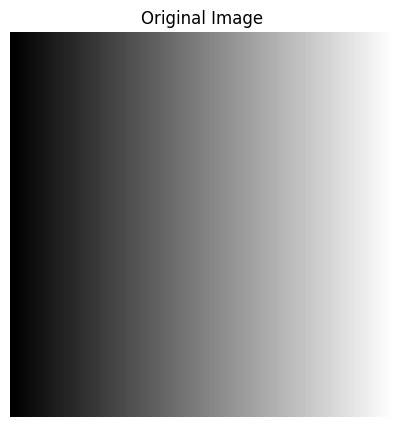

In [2]:
# 1️⃣ Step 1: Create a simple grayscale image (100x100)
# For demonstration, we'll use a smooth gradient pattern
image = np.tile(np.linspace(0, 1, 100), (100, 1))  # shape = (100, 100)

plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# 2️⃣ Step 2: PCA - Manual Steps
# a) Center the data by subtracting the mean of each column
image_mean = np.mean(image, axis=0)
centered_image = image - image_mean

# b) Calculate covariance matrix (measures how columns vary together)
cov_matrix = np.cov(centered_image, rowvar=False)

# c) Find eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [4]:
# 3️⃣ Step 3: Sort eigenvalues & eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Keep only top 'k' components (compress)
k = 20  # You can experiment with 10, 20, 50
top_eigenvectors = eigenvectors[:, :k]

In [5]:
# 4️⃣ Step 4: Reconstruct the image using top components
# Project original data onto top eigenvectors
projected_data = centered_image @ top_eigenvectors

# Reconstruct image from projection
reconstructed_image = (projected_data @ top_eigenvectors.T) + image_mean


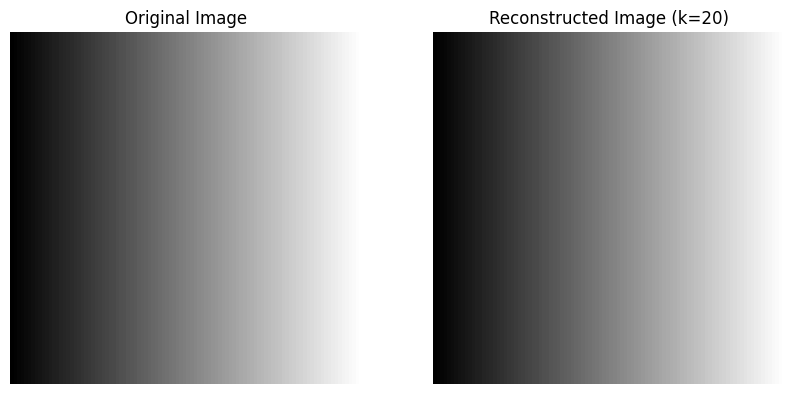

In [7]:
# 5️⃣ Step 5: Compare original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Reconstructed Image (k={k})")
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.show()